In [19]:
#AUTHOR Pather Stevenson, LARAFI Zakaria

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


M = [[0, 1,	1,	1,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0],
	[1,	0,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0],
	[1,	1,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	0,	0,	1,	0],
	[1,	1,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	0,	0,	0,	1],
	[1,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	0,	0,	0],
	[1,	1,	0,	0,	1,	0,	1,	1,	0,	1,	0,	0,	0,	1,	0,	0],
	[0,	0,	1,	1,	1,	1,	0,	1,	0,	0,	1,	0,	0,	0,	1,	0],
	[0,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	1,	0,	0,	0,	1],
	[1,	0,	0,	0,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	0,	0],
	[0,	1,	0,	0,	0,	1,	0,	0,	1,	0,	1,	1,	1,	1,	0,	0],
	[0,	0,	1,	0,	0,	0,	1,	0,	1,	1,	0,	1,	0,	0,	1,	1],
	[0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1],
	[1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	0,	0,	0,	1,	1,	1],
	[0,	1,	0,	0,	0,	1,	0,	0,	1,	1,	0,	0,	1,	0,	1,	1],
	[0,	0,	1,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	1,	0,	1],
	[0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	1,	1,	1,	1,	1,	0]]


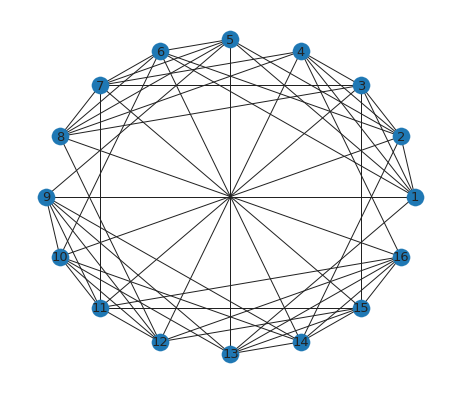

In [20]:
G = nx.from_numpy_matrix(np.array(M), create_using=nx.Graph())
pos = nx.circular_layout(G)
labels = {i : i + 1 for i in G.nodes()}

nx.draw_networkx_labels(G, pos, labels, font_size=13)
nx.draw_circular(G)

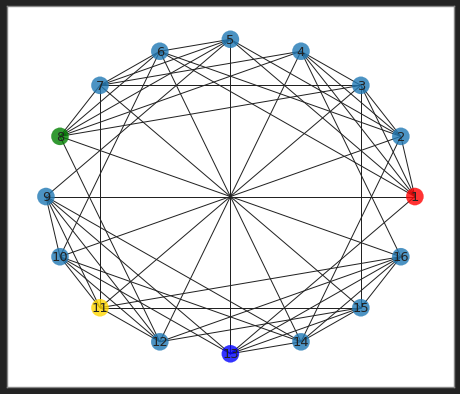

In [22]:
fig, ax = plt.subplots()
ax.set_facecolor("white")
# '#1f78b4' = default nodes color

color_list = ['red','#1f78b4','#1f78b4','#1f78b4','#1f78b4','#1f78b4','#1f78b4','green','#1f78b4','#1f78b4','gold','#1f78b4','blue','#1f78b4','#1f78b4','#1f78b4']

nx.draw_networkx_labels(G, pos, labels, font_size=13)
nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.8)
nx.draw_networkx_edges(G,pos)

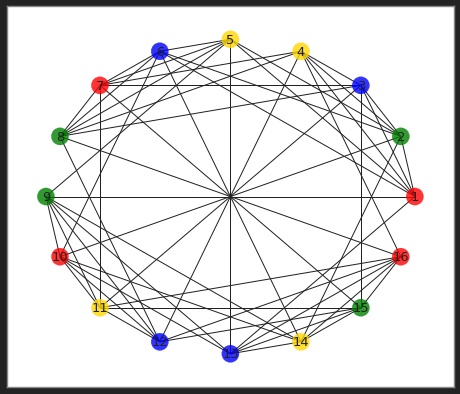

In [21]:
fig, ax = plt.subplots()
ax.set_facecolor("white")

color_list = ['red','green','blue','gold','gold','blue',
              'red','green','green','red','gold','blue',
              'blue','gold','green','red']

nx.draw_networkx_labels(G, pos, labels, font_size=13)
nx.draw_networkx_nodes(G,pos,node_color=color_list,alpha=0.8)
nx.draw_networkx_edges(G,pos)

In [3]:
from itertools import combinations

d = dict([(i,0) for i in range(16)])
res = []
for s in list(G.nodes()):
    if d[s] == 0:
        p = [s+1]
    else:
        p = []
    d[s] = 1
    for nn in list(nx.non_neighbors(G,s)):
        if(d[nn] == 0):
            p += [nn+1]
            d[nn] = 1
    if p != []: res += [p]
res += [[i] for i in range(1,17)] # ajout des singletons

#toutes les combinaisons possibles des éléments de res
all_stables = []
for s in res:
    for i in range(1,len(s)+1):
        all_stables.append([i for i in combinations(s,i)])
        
# tous les ensembles de taille 4
all_stables_graph = [e for e in all_stables for ee in e if len(ee) == 4]

p1, p2, p3, p4 = [],[],[],[]

In [5]:
res = []
for s in list(G.nodes()):
    p = [s+1]
    for nn in list(nx.non_neighbors(G,s)):
            p += [nn+1]
    res += [p]

In [5]:
res

[[1, 7, 8, 10, 11, 12, 14, 15, 16],
 [2, 7, 8, 9, 11, 12, 13, 15, 16],
 [3, 5, 6, 9, 10, 12, 13, 14, 16],
 [4, 5, 6, 9, 10, 11, 13, 14, 15],
 [5, 3, 4, 10, 11, 12, 14, 15, 16],
 [6, 3, 4, 9, 11, 12, 15, 16],
 [7, 1, 2, 9, 10, 12, 13, 14, 16],
 [8, 1, 2, 9, 10, 11, 13, 14, 15],
 [9, 2, 3, 4, 6, 7, 8, 15, 16],
 [10, 1, 3, 4, 5, 7, 8, 15, 16],
 [11, 1, 2, 4, 5, 6, 8, 13, 14],
 [12, 1, 2, 3, 5, 6, 7, 13, 14],
 [13, 2, 3, 4, 7, 8, 11, 12],
 [14, 1, 3, 4, 5, 7, 8, 11, 12],
 [15, 1, 2, 4, 5, 6, 8, 9, 10],
 [16, 1, 2, 3, 5, 6, 7, 9, 10]]

In [6]:
def verifylist(a,b):
    for e in a:
        if e not in b:
            return False
    return True

In [7]:
verifylist([1,2],[1,2])

True

In [ ]:
from random import sample, randint
from itertools import chain

p1,p2,p3,p4 = sample(res[randint(0,len(res)-1)],4),sample(res[randint(0,len(res)-1)],4),sample(res[randint(0,len(res)-1)],4),sample(res[randint(0,len(res)-1)],4)
l = list(chain(p1,p2,p3,p4))

#while not verifylist(list(G.nodes()),l):
    #p1,p2,p3,p4 = sample(res[randint(0,len(res)-1)],4),sample(res[randint(0,len(res)-1)],4),sample(res[randint(0,len(res)-1)],4),sample(res[randint(0,len(res)-1)],4)
    #l = list(chain(p1,p2,p3,p4))

In [ ]:
l = list(chain(p1,p2,p3,p4))
max(l,key=l.count)

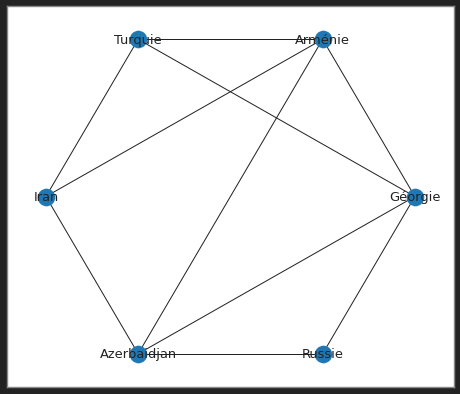

In [2]:
mCartes = [
[0, 1, 1, 0, 1, 1],
[1, 0, 1, 1, 1, 0],
[1, 1, 0, 1, 0, 0],
[0, 1, 1, 0, 1, 0],
[1, 1, 0, 1, 0, 1],
[1, 0, 0, 0, 1, 0]
]

fig, ax = plt.subplots()
ax.set_facecolor("white")

CC = nx.from_numpy_matrix(np.array(mCartes), create_using=nx.Graph())
pos = nx.circular_layout(CC)
pays = ['Géorgie', 'Arménie', 'Turquie', 'Iran', 'Azerbaidjan', 'Russie']
labels = [(i,pays[i]) for i in range(len(pays))]

nx.draw_networkx_labels(CC, pos, dict(labels), font_size=13)
nx.draw_networkx_nodes(CC,pos)
nx.draw_networkx_edges(CC,pos)

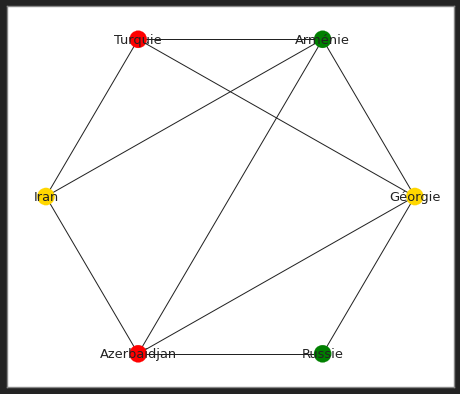

In [3]:
fig, ax = plt.subplots()
ax.set_facecolor("white")

color_list = ['gold', 'green', 'red', 'gold','red','green']

nx.draw_networkx_labels(CC, pos, dict(labels), font_size=13)
nx.draw_networkx_nodes(CC,pos,node_color=color_list)
nx.draw_networkx_edges(CC,pos)

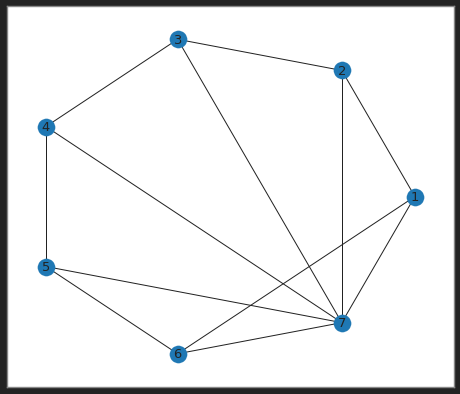

In [4]:
GSM = [
[0, 1, 0, 0, 0, 1, 1],
[1, 0, 1, 0, 0, 0, 1],
[0, 1, 0, 1, 0, 0, 1],
[0, 0, 1, 0, 1, 0, 1],
[0, 0, 0, 1, 0, 1, 1],
[1, 0, 0, 0, 1, 0, 1],
[1, 1, 1, 1, 1, 1, 0]]

fig, ax = plt.subplots()
ax.set_facecolor("white")

GG = nx.from_numpy_matrix(np.array(GSM), create_using=nx.Graph())
pos = nx.circular_layout(GG)
labels = {i : i + 1 for i in GG.nodes()}

nx.draw_networkx_labels(GG, pos, labels, font_size=13)
nx.draw_networkx_nodes(GG,pos)
nx.draw_networkx_edges(GG,pos)

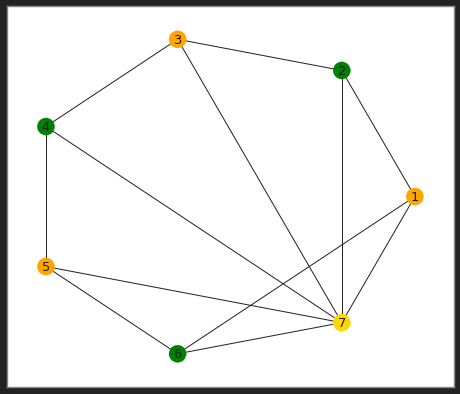

In [5]:
fig, ax = plt.subplots()
ax.set_facecolor("white")

color_list = ['orange', 'green', 'orange', 'green','orange','green','gold']

nx.draw_networkx_labels(GG, pos, labels, font_size=13)
nx.draw_networkx_nodes(GG,pos,node_color=color_list)
nx.draw_networkx_edges(GG,pos)